### Section 4.1: Bias Frames

In [60]:
# Importing necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


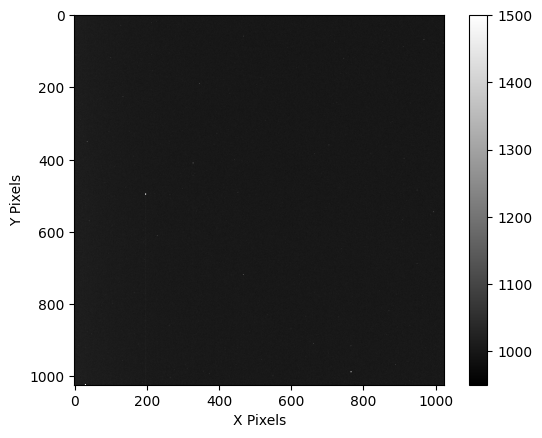

In [86]:
# Opening FITS file 
bias_frame = fits.open(r"../FITS_Files/3.1_bias.00000011.BIAS.FIT")

# Loading data from FITS file 
bias_frame_data = bias_frame[0].data

# Plotting the data with a colorbar
plt.imshow(bias_frame_data, cmap='gray', vmin=950, vmax=1500)  
plt.colorbar()
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

Text(0, 0.5, 'Counts')

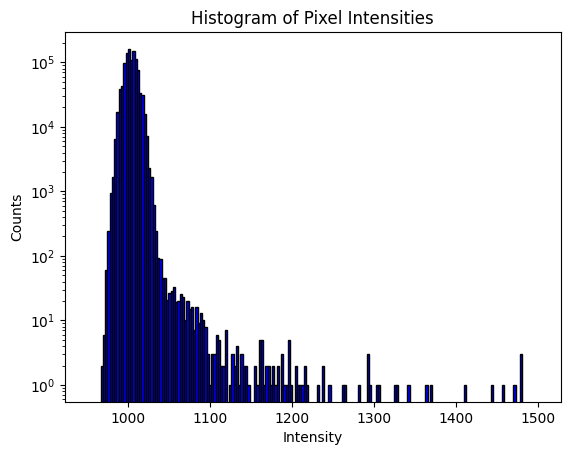

In [87]:
# Flattening the data into a 1D array
flattened_data = bias_frame_data.flatten()

# Plotting the histogram of intensity values
plt.hist(flattened_data, bins=200, range=(950, 1500), log=True, color='blue', edgecolor='black')  
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Intensity')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

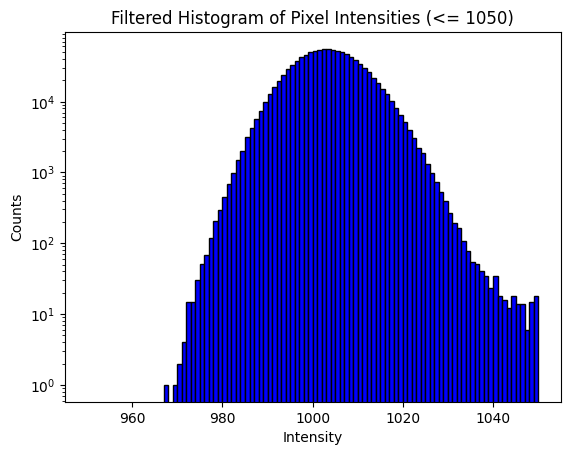

In [88]:
threshold = 1050 # or maybe 1100, 1150? 

# Filtering the data to include only values less than or equal to the threshold
filtered_data = flattened_data[flattened_data <= threshold]

# Plotting the new histogram
plt.hist(filtered_data, bins=100, range=(950, 1050), log=True, color='blue', edgecolor='black')
plt.title('Filtered Histogram of Pixel Intensities (<= 1050)')
plt.xlabel('Intensity')
plt.ylabel('Counts')

In [89]:
# Calculate the number of pixels cut
num_cut_pixels = len(flattened_data) - len(filtered_data)

# Calculate the fraction of pixels that were cut
fraction_cut = (num_cut_pixels / len(flattened_data)) * 100

# Output the statistics
print(f"Number of pixels cut: {num_cut_pixels}")
print(f"Fraction of pixels cut: {fraction_cut}")

Number of pixels cut: 413
Fraction of pixels cut: 0.039386749267578125


In [90]:
# Calculate the mean and standard deviation of the filtered data
mean_filtered = np.mean(filtered_data)
std_filtered = np.std(filtered_data)

# Output the statistics
print(f"Mean of filtered data: {mean_filtered}")
print(f"Standard deviation of filtered data: {std_filtered}")

Mean of filtered data: 1002.9957325339666
Standard deviation of filtered data: 7.718023440399738


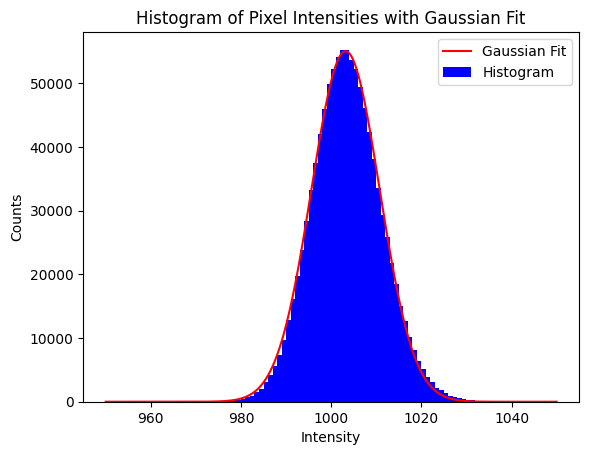

In [91]:
def plot_gaussian(data, range_values, mean, stddev, num_bins):
    """
    Plot a histogram of the pixel intensities with an overlaid Gaussian fit.
    
    :param data: The pixel intensity data to plot.
    :type data: np.ndarray
    :param range_values: The range for the histogram (min, max).
    :type range_values: tuple 
    :param mean: The mean of the Gaussian fit. 
    :type mean: float :unit: Analog Digital Unit (ADU)
    :param stddev: The standard deviation of the Gaussian fit. 
    :type stddev: float :unit: Analog Digital Unit (ADU)
    :param num_bins: The number of bins to use for the histogram.
    :type num_bins: int
    :return: Displays the plot with the histogram and Gaussian fit.
    :rtype: None
    """
    # Calculate histogram
    bin_heights, bin_borders = np.histogram(data, bins=num_bins, range=range_values)
    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2

    # Initialize Gaussian model
    gaussian = models.Gaussian1D(mean=mean, stddev=stddev)
    
    # Select fitting algorithm
    fitter = fitting.LevMarLSQFitter()
    
    # Fit the Gaussian model to the histogram data
    best_fit = fitter(gaussian, bin_centers, bin_heights)

    # Determine x-values for Gaussian fit
    x_interval_Gaussian = np.linspace(range_values[0], range_values[1], 10000)

    # Create the plot
    plt.figure()
    plt.bar(bin_centers, bin_heights, width=bin_widths, label='Histogram', log=False, color='blue')
    plt.plot(x_interval_Gaussian, best_fit(x_interval_Gaussian), label='Gaussian Fit', color='red')
    plt.xlabel('Intensity')
    plt.ylabel('Counts')
    plt.title('Histogram of Pixel Intensities with Gaussian Fit')
    plt.legend()
    plt.show()

# Example usage
plot_gaussian(data=filtered_data, range_values=(950, 1050), mean=np.mean(filtered_data), stddev=np.std(filtered_data), num_bins=100)


In [93]:
# Gain of STL-1001E camera
gain = 2 # :unit: e-/ADU

# Actual number of electrons of STL-1001E camera
actual_num_electrons = 14.8 #:unit: e- RMS

# Calculate the measured number of electrons 
measured_num_electrons = gain * np.std(filtered_data)

# Calculate the difference and percentage error
difference = measured_num_electrons - actual_num_electrons
percentage_error = (difference / actual_num_electrons) * 100

# Output the statistics
print(f"Measured Number of Electrons: {measured_num_electrons} e-")
print(f"Difference: {difference} e-")
print(f"Percentage Error: {percentage_error}%")

Measured Number of Electrons: 15.436046880799475 e-
Difference: 0.6360468807994746 e-
Percentage Error: 4.297614059455909%
